# Data Visualization with Python

* <a href="https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/4">Why Data Visualization?</a>
* <a href="https://towardsdatascience.com/10-compelling-reasons-to-learn-python-for-data-science-fa31160321cb">Why Python?</a>
* Python Tools to Visualize Data
    * <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">Pandas</a>
    * <a href="https://matplotlib.org/">Matplotlib</a> 
    * <a href="https://seaborn.pydata.org">Seaborn</a> 
    * <a href="https://open-data-analytics.medium.com/top-10-growing-data-visualization-libraries-in-python-in-2023-813d1aefedcc">... and many other libraries</a>

### Week 1
    * Intro in Data Visualization and Python Visualization Libraries
    * Pandas 
        * Linear plot
        * Scatter plot
        * Area plot
        * Bar chart
        * Pie chart
        * Histogram
        * Boxplot
        * Hexagonal bin plot
    * Pandas pro and cons

In [15]:
# Import libraries for Week 1 
%matplotlib inline
import pandas as pd
import numpy as np

### Line graph with Pandas
https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

In [16]:
x = np.random.randn(20)
df_1 = pd.DataFrame({'x' : x})
print(df_1)

           x
0  -0.428455
1  -1.457642
2  -0.075259
3  -0.855660
4   0.960940
5  -0.591196
6   1.416010
7  -0.196494
8   0.775100
9   0.219213
10  0.741520
11 -0.248625
12 -0.998239
13 -1.075539
14 -1.600018
15 -2.203888
16  1.526562
17  0.181977
18  0.433527
19 -0.047375


<Axes: >

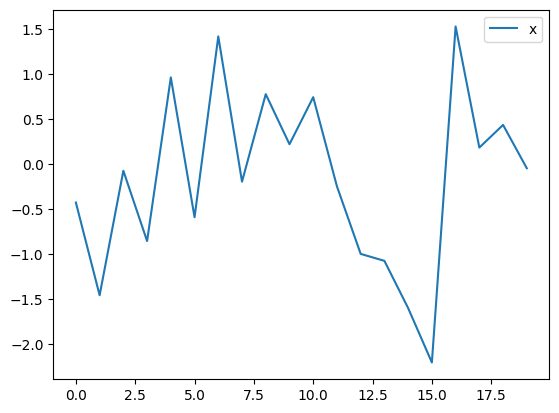

In [17]:
df_1.plot()

<Axes: title={'center': 'My first linear plot'}, xlabel='x value', ylabel='index'>

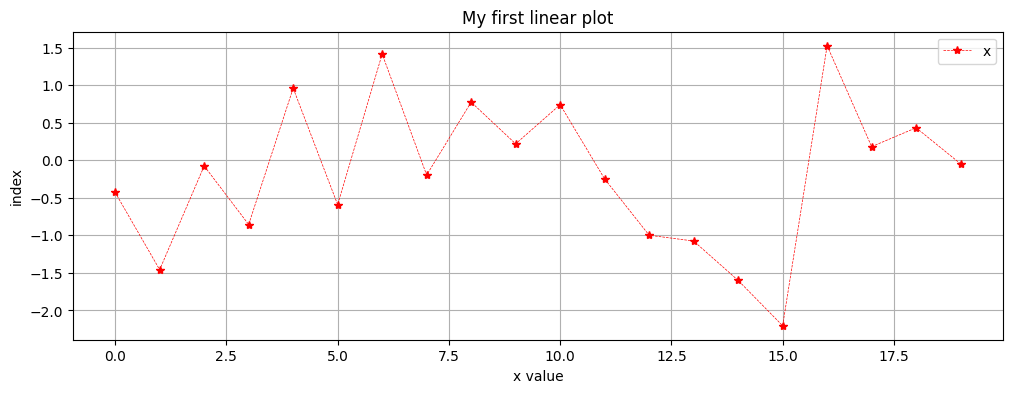

In [19]:
df_1.plot(figsize = (12,4),
         title = 'My first linear plot',
         xlabel = 'x value',
         ylabel = 'index',
         color = 'r',
         linestyle = '--', # 
         linewidth = 0.5,
         marker = '*',
         grid = True)

In [7]:
x = np.random.randn(20)
y = np.random.uniform(min(x), max(x), size = len(x))
df_2 = pd.DataFrame({'x_value' : x,
                     'y_value' : np.sort(y)
                    })
print(df_2)

     x_value   y_value
0   0.020518 -1.426759
1  -0.658931 -1.348806
2   0.407581 -1.347918
3   0.642342 -1.279943
4   0.537539 -0.793922
5   0.504937 -0.693229
6   0.579493 -0.249475
7  -1.500069  0.059318
8  -0.502465  0.101463
9   1.277344  0.120965
10 -1.184910  0.424902
11 -0.804300  0.575699
12 -1.421189  1.130756
13 -0.160741  1.156125
14 -1.749590  1.314713
15  2.894264  1.405972
16  2.977847  1.544029
17  0.328696  1.581289
18  0.555355  1.665416
19  0.258877  1.996429


<Axes: >

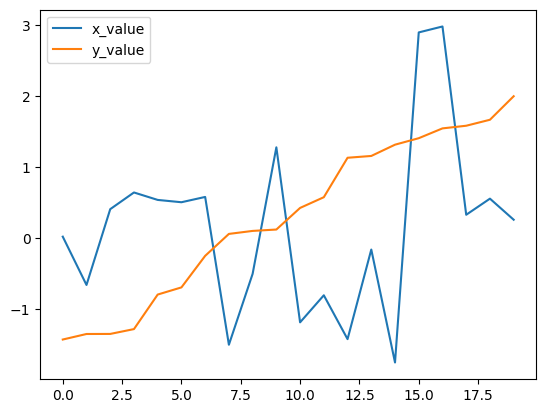

In [8]:
df_2.plot()

array([[<Axes: xlabel='index'>],
       [<Axes: xlabel='index'>]], dtype=object)

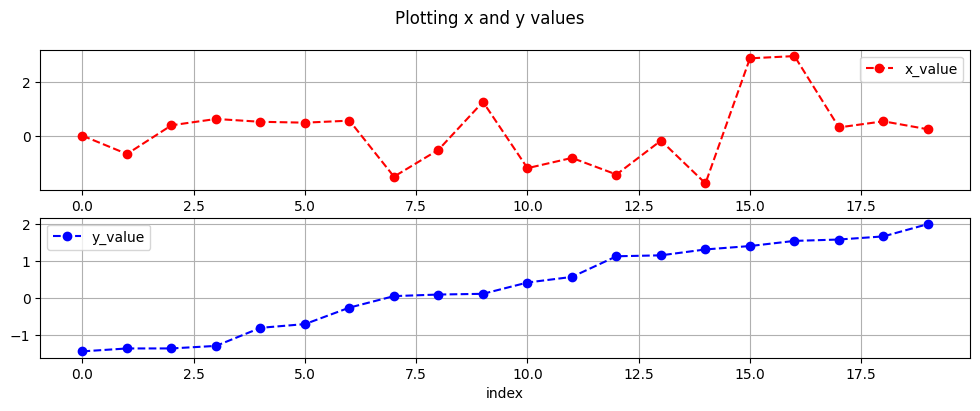

In [9]:
df_2.plot(y=['x_value','y_value'],
          subplots = True, layout = (2,1),
          figsize = (12,4),
          title = 'Plotting x and y values',
          xlabel = 'index',
          grid = True,
          color = ['r', 'b'], linestyle = '--',marker = 'o',
          sharex = False)

In [13]:
# Example to practice
url = 'https://api.cba.am/ExchangeRatesToCSV.ashx?DateFrom=2003-01-01&DateTo=2023-11-24&ISOCodes=EUR,USD'
rate = pd.read_csv(url,  index_col = False)
print(rate.info())
print('-'*80)
print(rate.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5278 entries, 0 to 5277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ամսաթիվ  5278 non-null   object 
 1   EUR      5278 non-null   float64
 2   USD      5278 non-null   float64
dtypes: float64(2), object(1)
memory usage: 123.8+ KB
None
--------------------------------------------------------------------------------
      Ամսաթիվ     EUR     USD
0  07/01/2003  609.79  585.10
1  08/01/2003  611.56  586.63
2  09/01/2003  600.86  579.03
3  10/01/2003  612.01  582.48
4  13/01/2003  611.78  582.48


In [14]:
rate.columns = ['Year', 'EUR/AMD', 'USD/AMD']
# rate['Year'] = pd.to_datetime(rate['Year'])
rate.set_index(pd.to_datetime(rate['Year']), inplace = True)
rate.head()

ValueError: time data "13/01/2003" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<AxesSubplot:title={'center':'EUR and USD exhange rates 2003 - 2023'}, xlabel='Year'>

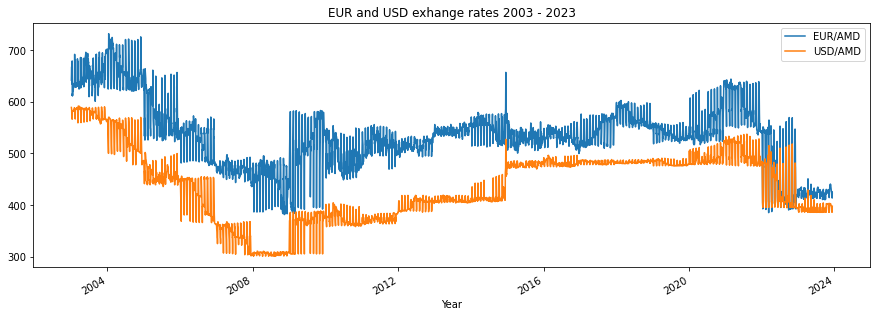

In [54]:
rate.plot(x = 'Year', figsize=(15,5),
                     title = 'EUR and USD exhange rates 2003 - 2023')

In [68]:
mean_month_rate = rate.groupby(pd.PeriodIndex(rate['Year'], freq="M")).mean()
mean_month_rate.head()

,EUR/AMD,USD/AMD
Year,,
2003-01,632.166190,581.382381
2003-02,643.982222,584.397778
2003-03,641.023462,586.721154
2003-04,644.377727,584.236818
2003-05,673.459524,582.723810


Text(0, 0.5, 'USD exchange rate')

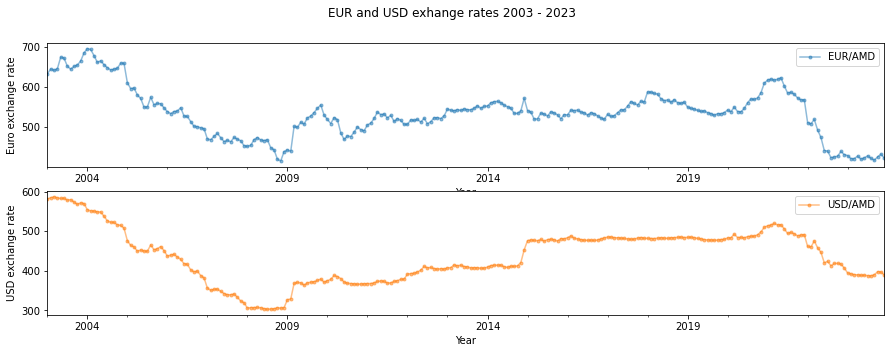

In [75]:
rate_month = mean_month_rate.plot(figsize=(15,5),marker = '.', alpha=0.5, subplots = True, 
                     title = 'EUR and USD exhange rates 2003 - 2023', ylabel = "Exchange Rate",
                     sharex=False)
rate_month[0].set_ylabel('Euro exchange rate')
rate_month[1].set_ylabel('USD exchange rate')

In [109]:
import seaborn as sn
sn.get_dataset_names ()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [112]:
sn.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [157]:
df_irirs.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [147]:
df_iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [115]:
df_iris = sn.load_dataset('iris')

<AxesSubplot:>

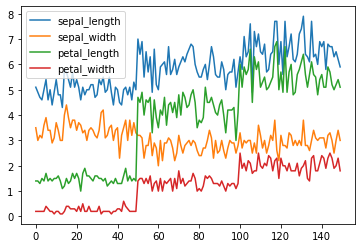

In [116]:
df_iris.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

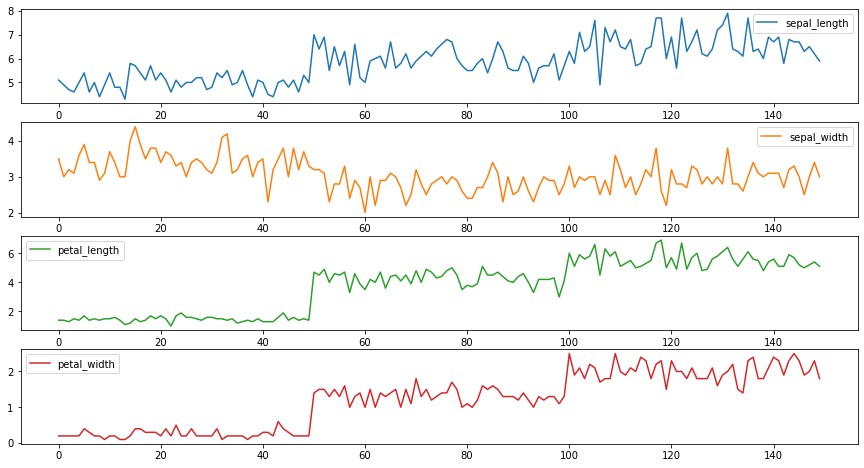

In [119]:
df_iris.plot(subplots = True, figsize  = (15, 8), sharex = False)

<AxesSubplot:ylabel='Frequency'>

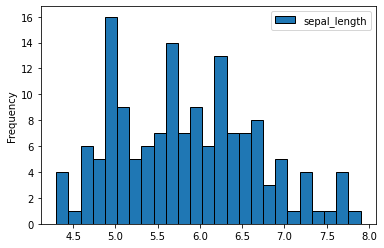

In [128]:
df_iris.plot.hist(y ='sepal_length',x ='species', bins = 25, edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

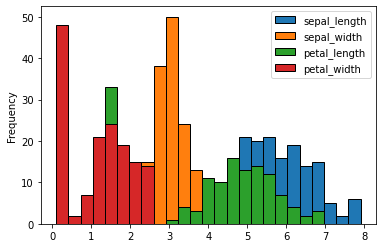

In [161]:
df_iris.plot.hist(x ='species', bins = 25, edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

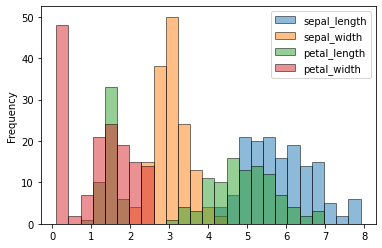

In [162]:
df_iris.plot.hist(x ='species', bins = 25, edgecolor='black', alpha=0.5)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

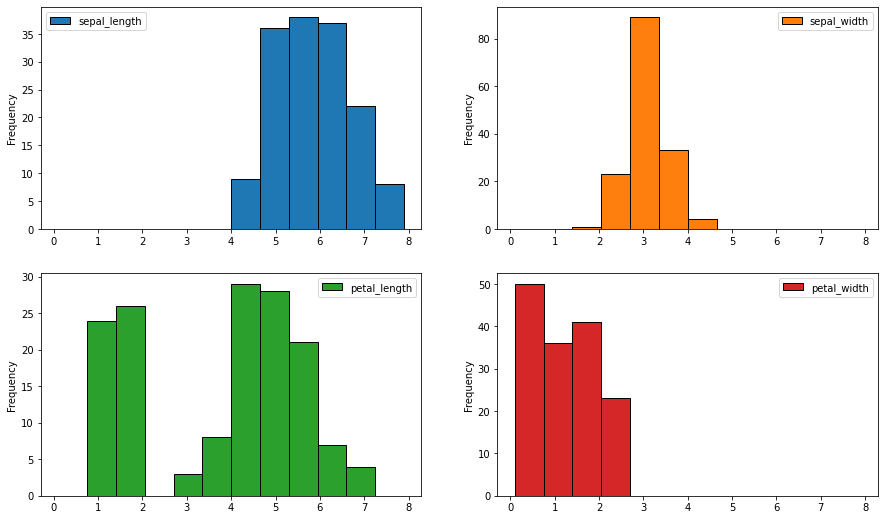

In [165]:
df_iris.plot.hist(x ='species', bins = 12, 
                  edgecolor='black', 
                  subplots = True, layout = (2,2), 
                  figsize = (15,9), sharex = False)

<AxesSubplot:>

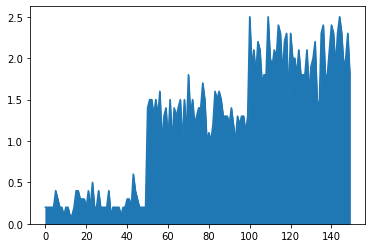

In [134]:
df_iris['petal_width'].plot.area()

<AxesSubplot:>

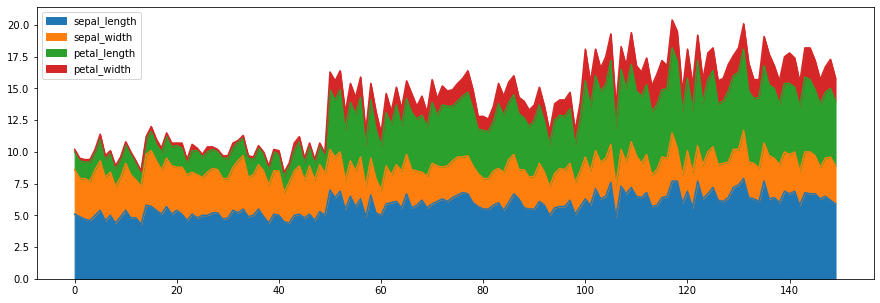

In [137]:
df_iris.plot.area(figsize = (15,5))

<AxesSubplot:>

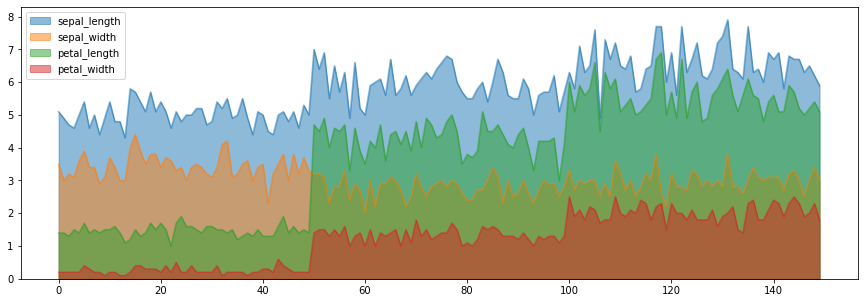

In [139]:
df_iris.plot.area(figsize = (15,5), stacked = False)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

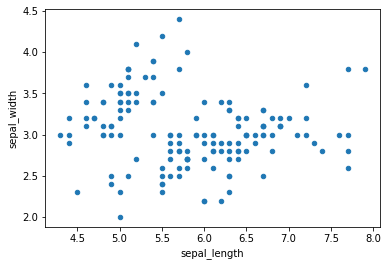

In [140]:
df_iris.plot.scatter(x = 'sepal_length', y = 'sepal_width')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

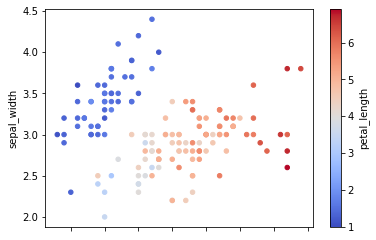

In [183]:
df_iris.plot.scatter(x = 'sepal_length', y = 'sepal_width', c = 'petal_length', colormap = 'coolwarm')

In [186]:
import matplotlib.pyplot as plt
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

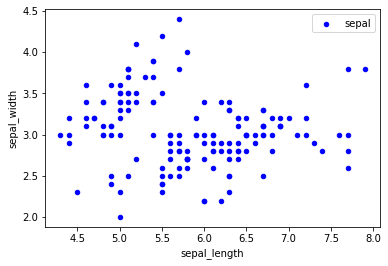

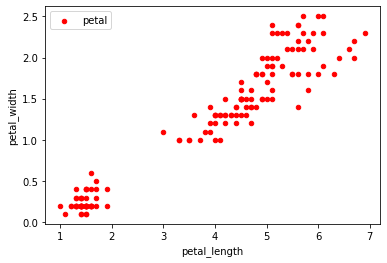

In [142]:
df_iris.plot.scatter(x='sepal_length', y='sepal_width', 
                     color='Blue', label='sepal')
df_iris.plot.scatter(x='petal_length', y='petal_width', color='red', 
                  label='petal')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

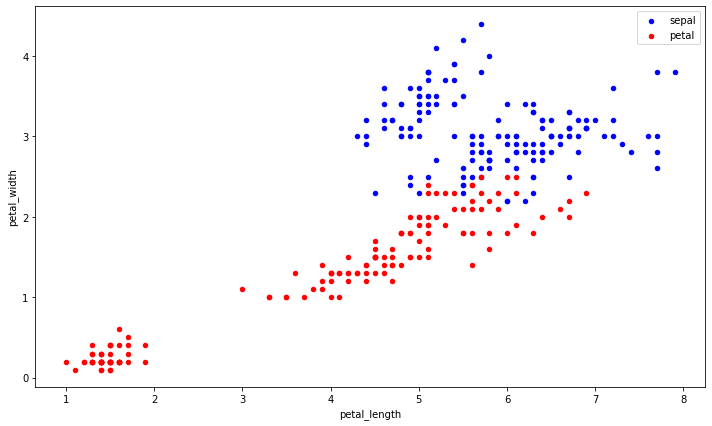

In [145]:
ax = df_iris.plot.scatter(x='sepal_length', y='sepal_width', 
                     color='Blue', label='sepal', figsize = (12,7))
df_iris.plot.scatter(x='petal_length', y='petal_width', color='red', 
                  label='petal', ax=ax)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

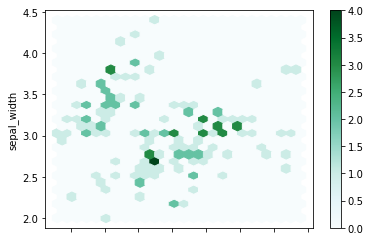

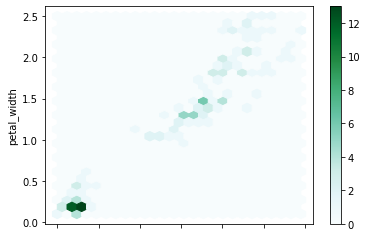

In [149]:
df_iris.plot.hexbin(x='sepal_length', y='sepal_width', gridsize=25)
df_iris.plot.hexbin(x='petal_length', y='petal_width', gridsize=25)

<AxesSubplot:>

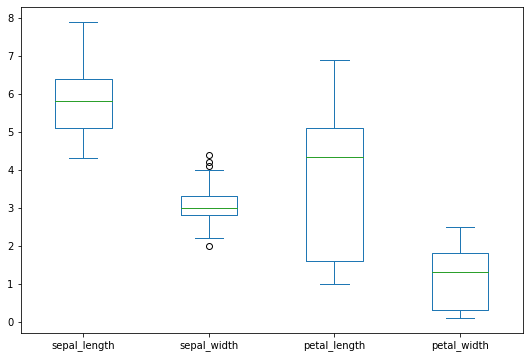

In [166]:
df_iris.plot(kind='box', figsize=(8,5))

<AxesSubplot:>

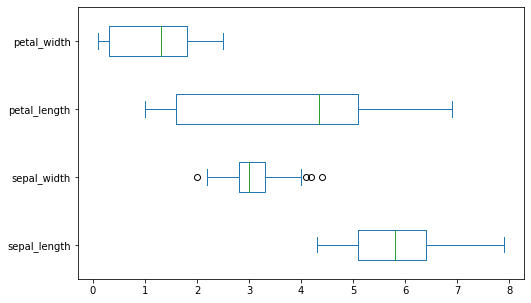

In [168]:
df_iris.plot(kind='box', vert = False, figsize=(8,5))

<AxesSubplot:xlabel='species'>

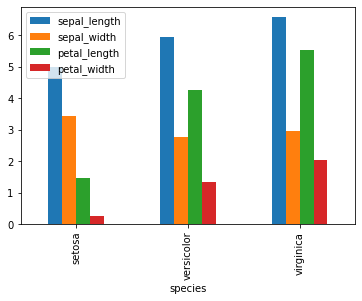

In [170]:
df_iris.groupby(df_iris["species"]).mean().plot(kind = 'bar')

<AxesSubplot:xlabel='species'>

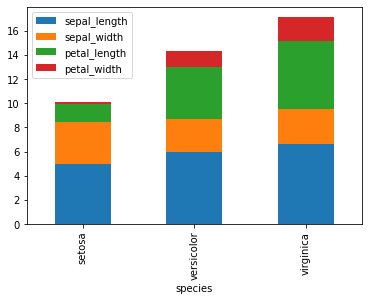

In [171]:
df_iris.groupby(df_iris["species"]).mean().plot(kind = 'bar', stacked = True)

<AxesSubplot:ylabel='sepal_length'>

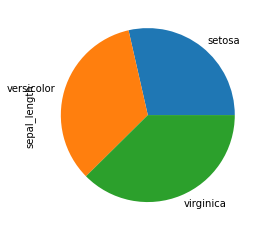

In [174]:
df_iris['sepal_length'].groupby(df_iris["species"]).mean().plot.pie()

array([[<AxesSubplot:ylabel='sepal_length'>,
        <AxesSubplot:ylabel='sepal_width'>],
       [<AxesSubplot:ylabel='petal_length'>,
        <AxesSubplot:ylabel='petal_width'>]], dtype=object)

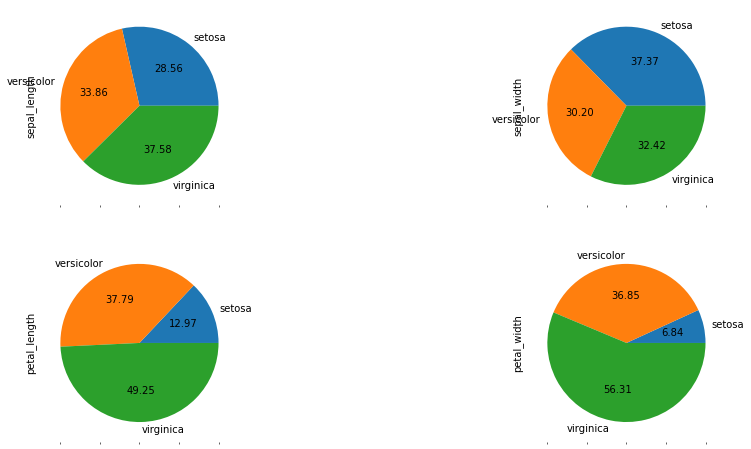

In [180]:
df_iris.groupby(df_iris["species"]).mean().plot.pie(subplots = True, 
                                                    layout = (2,2), 
                                                    figsize = (16,8), 
                                                    legend = None,
                                                   autopct='%.2f')

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

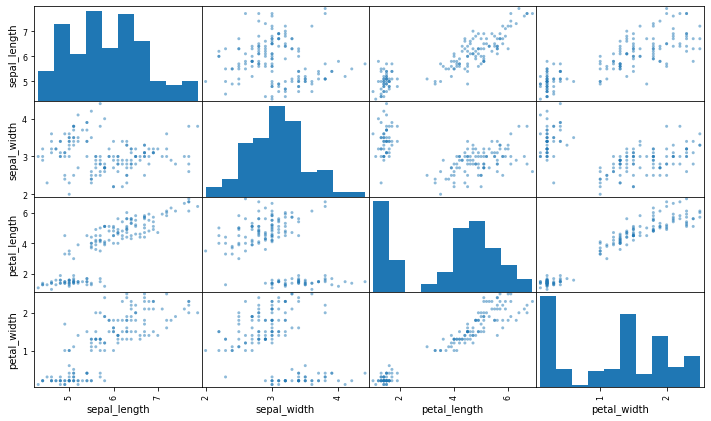

In [181]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_irirs, alpha=0.5, figsize = (12,7))